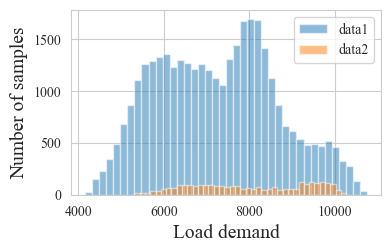

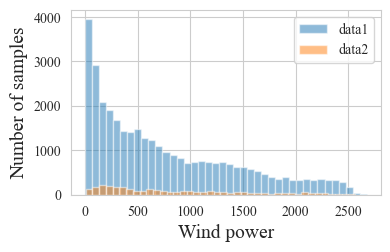

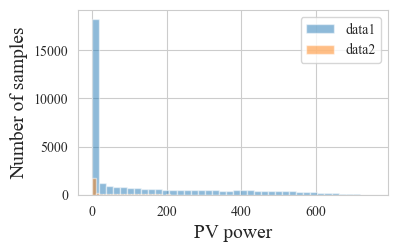

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(df, start, end):
    load = df['AT_load_actual_entsoe_transparency'].values[start:end]
    wind = df['AT_wind_onshore_generation_actual'].values[start:end]
    pv = df['AT_solar_generation_actual'].values[start:end]
    return load, wind, pv

def clean_data(data):
    mask = np.isnan(data)
    return data[~mask]

def visualize_comparison(data1, data2, name):
    size = 0.8
    plt.figure(figsize=(5*size, 3*size))
    plt.hist(data1, bins=40, alpha=0.5, label='data1')
    plt.hist(data2, bins=40, alpha=0.5, label='data2')
    plt.legend(loc='upper right')
    plt.xlabel(name, fontsize=14)  
    plt.ylabel('Number of samples', fontsize=14)  
    plt.savefig(name+'.jpg', dpi=600, bbox_inches='tight', format='jpg')
    plt.show()
    
# data extraction
df = pd.read_csv('wind_pv_load_of_Austria.csv')
data_number1 = 365*24*4
data_number2 = data_number1 + 30*24*4

load_2015, wind_2015, pv_2015 = load_data(df, 0, data_number1)
load_2016, wind_2016, pv_2016 = load_data(df, data_number1, data_number2)

data = [load_2015, wind_2015, pv_2015, load_2016, wind_2016, pv_2016]

# Data_Cleaning
data = [clean_data(d) for d in data]

# plot
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"

visualize_comparison(data[0], data[3], name='Load demand')
visualize_comparison(data[1], data[4], name='Wind power')
visualize_comparison(data[2], data[5], name='PV power')